<a href="https://colab.research.google.com/github/Atsu-fuji/ndl/blob/main/2025_NDL_DigitalLibraryxAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**国立国会図書館デジタルライブラリーの資料をAPIで取得する**
---



ここでは、自分の関心のあるキーワードについて、以下の手順で出典資料テキストデータの取得までたどり着き、簡単な集計作業まで行えるようにする方法を紹介します。

【手順】

1.   出現しているテキストの書誌情報を取得する
2.   実際にテキストを取得する
3.   取得した書誌情報やテキストをもとに集計する


【参考】

- 「次世代デジタルライブラリーAPIドキュメント」https://lab.ndl.go.jp/dl/swagger-ui.html#/

###注意点

**このAPIで取得できる範囲**

次世代デジタルライブラリーの収録資料（著作権保護期間が満了した図書28万点及び古典籍資料8万点）の書誌情報、OCR全文テキストデータなど

→　「NDL ngram viewer」や「NDLデジタルコレクション」で検索してヒットする結果よりも（かなり）少ないことに注意

【参照】
- 「[APIから検索・取得可能なデータ](https://lab.ndl.go.jp/service/tsugidigi/apiinfo/#:~:text=%E3%81%AEAPI%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6-,API%E3%81%8B%E3%82%89%E6%A4%9C%E7%B4%A2%E3%83%BB%E5%8F%96%E5%BE%97%E5%8F%AF%E8%83%BD%E3%81%AA%E3%83%87%E3%83%BC%E3%82%BF,-%E6%AC%A1%E4%B8%96%E4%BB%A3%E3%83%87%E3%82%B8%E3%82%BF%E3%83%AB%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA%E3%83%BC)」


- 「[次世代デジタルライブラリーご利用に当たって](https://lab.ndl.go.jp/service/tsugidigi/#:~:text=%E3%81%8A%E3%82%8A%E3%81%BE%E3%81%9B%E3%82%93%E3%80%82-,%E3%81%94%E5%88%A9%E7%94%A8%E3%81%AB%E5%BD%93%E3%81%9F%E3%81%A3%E3%81%A6,-%E6%AC%A1%E4%B8%96%E4%BB%A3%E3%83%87%E3%82%B8%E3%82%BF%E3%83%AB%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA%E3%83%BC)」


**コードについて**

以下で示しているコードは、作成者がChatGPT（4-o）との対話を通して生成し、動作の確認を経たものです。無料プランのため、一度にこれらのコードを完成させたわけではありませんが、無料でどこまでやれるかの検証でもあると思ってください。

#1．出現しているテキストの書誌情報を取得する

##ライブラリのインストールとセットアップ

In [ ]:
# 必要なライブラリのインポート
import requests
import json
import pandas as pd

##試作段階

###APIからデータを取得してJSONファイルに保存

In [ ]:
# APIのURL
api_url = "https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3"

# APIリクエストの送信
response = requests.get(api_url)

# ステータスコードの確認
if response.status_code == 200:
    # JSONデータを取得
    data = response.json()

    # JSONデータをローカルに保存
    with open("ndl_books.json", "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)
    print("JSONデータを保存しました: ndl_books.json")
else:
    print(f"APIリクエストに失敗しました。ステータスコード: {response.status_code}")


JSONデータを保存しました: ndl_books.json


###保存したJSONファイルを読み込む

In [ ]:
# 保存したJSONファイルを読み込み
with open("ndl_books.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# データの内容を確認 (オプション)
print(data.keys())  # データのキーを確認

dict_keys(['facets', 'list', 'hit', 'from'])


取得したJSONファイルは'facets', 'list', 'hit', 'from'をキーにもつ辞書形式で格納されていることがわかる。

実際に、それぞれのキーにどのようなデータ型の値が格納されているかを把握する。

In [ ]:
def explore_json(data, level=0):
    """
    JSONデータ内の構造を再帰的に表示する関数
    """
    indent = "  " * level  # 階層に応じたインデント
    if isinstance(data, dict):  # 辞書の場合
        for key, value in data.items():
            print(f"{indent}- {key}: {type(value).__name__}")
            explore_json(value, level + 1)
    elif isinstance(data, list):  # リストの場合
        print(f"{indent}- (list of {len(data)} items)")
        if len(data) > 0:
            # リスト内の最初の要素を探索 (他の要素も同じ構造と仮定)
            explore_json(data[0], level + 1)
    else:  # 他のデータ型の場合
        print(f"{indent}- {type(data).__name__}")

# JSONデータの構造を表示
explore_json(data)


- facets: list
  - (list of 1 items)
    - counts: dict
      - false: int
        - int
    - field: str
      - str
- list: list
  - (list of 20 items)
    - id: str
      - str
    - version: int
      - int
    - title: str
      - str
    - volume: str
      - str
    - responsibility: str
      - str
    - publisher: str
      - str
    - published: str
      - str
    - publishyear: int
      - int
    - ndc: str
      - str
    - bibId: str
      - str
    - callNo: str
      - str
    - autoTOCFlag: bool
      - bool
    - leftopen: bool
      - bool
    - index: list
      - (list of 0 items)
    - autoTOCindex: list
      - (list of 0 items)
    - graphictagmetrics: list
      - (list of 8 items)
        - tagname: str
          - str
        - count: int
          - int
    - page: int
      - int
    - isClassic: bool
      - bool
    - width: int
      - int
    - height: int
      - int
    - highlights: list
      - (list of 1 items)
        - str
    - keywordsmetrics:

###必要な項目を表形式にする

今回は、"id", "version", "title", "volume", "responsibility", "publisher", "publishyear"を取得したいので、これらを表形式にまとめる。

In [ ]:
# 必要なデータをリストから抽出
records = data['list']  # JSON内のリストデータ

# 必要なキーを取り出してDataFrameを作成
keys = ["id", "version", "title", "volume", "responsibility", "publisher", "publishyear"]
filtered_data = [{key: record.get(key, '') for key in keys} for record in records]

# pandas DataFrameに変換
df = pd.DataFrame(filtered_data)

# 表の内容を確認
df.head()

,id,version,title,volume,responsibility,publisher,publishyear
0,1137408,8,鯨を追って,,米窪満亮 著,第一公論社,1941
1,987190,11,新撰中等習画帖,第4巻,小林万吾 編,国光印刷,1919
2,1067700,8,鯨を追つて,,米窪満亮 著,第一公論社,1941
3,918904,11,現代国語読本教授参考書,巻1,東京開成館編輯所 編,東京開成館,1923
4,948851,8,へちまのかは,,杉村楚人冠 著,至誠堂書店,1914


In [ ]:
df

,id,version,title,volume,responsibility,publisher,publishyear
0,1137408,8,鯨を追って,,米窪満亮 著,第一公論社,1941
1,987190,11,新撰中等習画帖,第4巻,小林万吾 編,国光印刷,1919
2,1067700,8,鯨を追つて,,米窪満亮 著,第一公論社,1941
3,918904,11,現代国語読本教授参考書,巻1,東京開成館編輯所 編,東京開成館,1923
4,948851,8,へちまのかは,,杉村楚人冠 著,至誠堂書店,1914
5,955398,7,海の自然科学,,若林欽 著,洛陽堂,1917
6,767465,7,両極探検画談,,蘆谷蘆村 (重常) 著,勧業書院,1911
7,917323,9,国家の起原 : ドラコー王朝,,岩佐作太郎 訳,黒人社,1926
8,1716435,8,南極土産 : 片吟鳥の話,1,多田恵一 著,春陽堂,1912
9,1088051,10,白秋詩歌選,,北原白秋 著,新潮社,1925


###表の保存

In [ ]:
# DataFrameをCSVとして保存
df.to_csv("extracted_data.csv", index=False, encoding="utf-8-sig")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

なお、エンコーディングに”utf-8”ではなく"utf-8-sig"を用いているのは、Excelで開く場合の文字化け防止のため。”utf-8”だと正しくUTF-8として認識されず、データが正しく表示されない（実際には行頭含め21行目までデータがあるのに、最後の数行が特定のセルにまとめられてしまうなど）。

Excelで開いたりせず、colab上でデータの読み込みを行う場合には"utf-8"のままでよいと思われる。

##ターゲットのデータをすべて取得するには

上のデモではAPIキーはデフォルトのままだったので、総ヒット数に対してごくわずかしか書誌情報を取得できていない（20件）。

そこで、パラメータを変更して、目当てにしている書誌情報をすべて取得できるようにする。

In [ ]:
# APIの基本URL
base_url = "https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3"

# 追加するパラメータ
all_data = {"list": [], "hit": 0}  # 取得データを格納する変数

# 初期設定
from_position = 0  # 開始位置
total_hits = None  # 総ヒット数の初期値
size = 100  # デフォルトの取得件数

# データ取得ループ
while True:
    # 残り件数を計算してsizeを調整
    if total_hits is not None:
        remaining = total_hits - from_position
        if remaining < 50:  # 残り50件未満
            size = 20
        elif remaining < 100:  # 残り100件未満
            size = 50
        else:
            size = 100

    # URLの更新
    api_url = f"{base_url}&size={size}&from={from_position}"
    print(f"Fetching data from: {api_url} (size={size})")

    # APIリクエストの送信
    response = requests.get(api_url)

    # ステータスコードの確認
    if response.status_code != 200:
        print(f"APIリクエスト失敗: ステータスコード {response.status_code}")
        break

    # JSONデータの取得
    data = response.json()

    # 初回のみ総ヒット数を取得
    if total_hits is None:
        total_hits = data.get("hit", 0)
        all_data["hit"] = total_hits  # 総ヒット数を保存
        print(f"総ヒット数: {total_hits}")

    # データのリストを追加
    all_data["list"].extend(data.get("list", []))

    # 次の表示開始位置を計算
    from_position += size

    # すべてのデータを取得した場合は終了
    if from_position >= total_hits:
        print("すべてのデータを取得しました。")
        break

# JSONファイルに保存
with open("ndl_books_full.json", "w", encoding="utf-8") as f:
    json.dump(all_data, f, ensure_ascii=False, indent=4)
print("全データをndl_books_full.jsonに保存しました。")


Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=0 (size=100)
総ヒット数: 671
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=100 (size=100)
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=200 (size=100)
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=300 (size=100)
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=400 (size=100)
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=500 (size=100)
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=50&from=600 (size=50)
Fetching data from: https://lab.ndl.go.jp/dl/api

上のデータを実際に表にしてみると、データの数が671件よりも少なくなってしまっている。そこで、取得状況を確認しながらデータをとる。

修正版

In [ ]:
# APIの基本URL
base_url = "https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3"

# 追加するパラメータ
all_data = {"list": [], "hit": 0}  # 取得データを格納する変数

# 初期設定
from_position = 0  # 開始位置
total_hits = None  # 総ヒット数の初期値
size = 100  # デフォルトの取得件数

# データ取得ループ
while True:
    # 残り件数を計算してsizeを調整
    if total_hits is not None:
        remaining = total_hits - from_position
        if remaining < 50:  # 残り50件未満
            size = 20
        elif remaining < 100:  # 残り100件未満
            size = 50
        else:
            size = 100

    # URLの更新
    api_url = f"{base_url}&size={size}&from={from_position}"
    print(f"Fetching data from: {api_url} (size={size})")

    # APIリクエストの送信
    response = requests.get(api_url)

    # ステータスコードの確認
    if response.status_code != 200:
        print(f"APIリクエスト失敗: ステータスコード {response.status_code}")
        break

    # JSONデータの取得
    data = response.json()

    # 初回のみ総ヒット数を取得
    if total_hits is None:
        total_hits = data.get("hit", 0)
        all_data["hit"] = total_hits  # 総ヒット数を保存
        print(f"総ヒット数: {total_hits}")

    # データのリストを追加
    current_list = data.get("list", [])
    if not current_list:
        print(f"データが空です。終了します: from={from_position}, size={size}")
        break
    all_data["list"].extend(current_list)

    # 次の表示開始位置を計算
    from_position += size

    # 進捗を出力
    print(f"現在の取得件数: {len(all_data['list'])} / {total_hits}")

    # すべてのデータを取得した場合は終了
    if from_position >= total_hits:
        print("すべてのデータを取得しました。")
        break

# JSONファイルに保存
with open("ndl_books_full.json", "w", encoding="utf-8") as f:
    json.dump(all_data, f, ensure_ascii=False, indent=4)
print("全データをndl_books_full.jsonに保存しました。")


Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=0 (size=100)
総ヒット数: 671
現在の取得件数: 100 / 671
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=100 (size=100)
現在の取得件数: 200 / 671
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=200 (size=100)
現在の取得件数: 300 / 671
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=300 (size=100)
現在の取得件数: 400 / 671
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=400 (size=100)
現在の取得件数: 500 / 671
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=500 (size=100)
現在の取得件数: 600 / 671
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keywor

どうやら、600件目以降の呼び出しでうまく取れていないことがわかった。

さらに修正

In [ ]:
# APIの基本URL
base_url = "https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3"

# 追加するパラメータ
all_data = {"list": [], "hit": 0}  # 取得データを格納する変数

# 初期設定
from_position = 0  # 開始位置
total_hits = None  # 総ヒット数の初期値
size = 100  # デフォルトの取得件数

# データ取得ループ
while True:
    # 残り件数を計算してsizeを調整
    if total_hits is not None:
        remaining = total_hits - from_position
        if remaining <= 20:  # 残り20件以下
            size = remaining  # 残り件数をそのまま設定
        elif remaining < 50:  # 残り50件未満
            size = 20
        elif remaining < 100:  # 残り100件未満
            size = 50
        else:
            size = 100

    # URLの更新
    api_url = f"{base_url}&size={size}&from={from_position}"
    print(f"Fetching data from: {api_url} (size={size})")

    # APIリクエストの送信
    response = requests.get(api_url)

    # ステータスコードの確認
    if response.status_code != 200:
        print(f"APIリクエスト失敗: ステータスコード {response.status_code}")
        break

    # JSONデータの取得
    data = response.json()

    # 初回のみ総ヒット数を取得
    if total_hits is None:
        total_hits = data.get("hit", 0)
        all_data["hit"] = total_hits  # 総ヒット数を保存
        print(f"総ヒット数: {total_hits}")

    # データのリストを追加
    current_list = data.get("list", [])
    if not current_list:
        print(f"データが空です。終了します: from={from_position}, size={size}")
        break
    all_data["list"].extend(current_list)

    # 実際に取得できた件数を確認
    retrieved_count = len(current_list)
    print(f"取得データ件数: {retrieved_count}件 (from={from_position})")

    # 次の表示開始位置を計算
    from_position += retrieved_count

    # 進捗を出力
    print(f"現在の取得件数: {len(all_data['list'])} / {total_hits}")

    # すべてのデータを取得した場合は終了
    if from_position >= total_hits:
        print("すべてのデータを取得しました。")
        break

# JSONファイルに保存
with open("ndl_books_full.json", "w", encoding="utf-8") as f:
    json.dump(all_data, f, ensure_ascii=False, indent=4)
print("全データをndl_books_full.jsonに保存しました。")


Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=0 (size=100)
総ヒット数: 671
取得データ件数: 100件 (from=0)
現在の取得件数: 100 / 671
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=100 (size=100)
取得データ件数: 100件 (from=100)
現在の取得件数: 200 / 671
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=200 (size=100)
取得データ件数: 100件 (from=200)
現在の取得件数: 300 / 671
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=300 (size=100)
取得データ件数: 100件 (from=300)
現在の取得件数: 400 / 671
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=400 (size=100)
取得データ件数: 100件 (from=400)
現在の取得件数: 500 / 671
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E

取得できた場所から取り直すようにしたが、結局3件はとれていない。

##最終版

その他のパラメータについても調整しなおしたバージョン。

###単一キーワード
キーワードは公式のページと同じく「ペンギン」なので、実際に取り出したい単一のキーワードを以下のjapanese_textに入れてURL用にエンコードし、それをbase_urlに貼り付けて使用する。

In [ ]:
# URLエンコード用のモジュールをインポート
from urllib.parse import quote

# 日本語のテキストを入力
japanese_text = "ペンギン"

# URLエンコードを実行
url_encoded_text = quote(japanese_text)

# 結果を出力
print("元のテキスト:", japanese_text)
print("URLエンコードされたテキスト:", url_encoded_text)


元のテキスト: ペンギン
URLエンコードされたテキスト: %E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3


In [ ]:
# APIの基本URL
base_url = "https://lab.ndl.go.jp/dl/api/book/search?keyword="+url_encoded_text

# 追加するパラメータ
all_data = {"list": [], "hit": 0}  # 取得データを格納する変数

# 初期設定
from_position = 0  # 開始位置
total_hits = None  # 総ヒット数の初期値
size = 100  # デフォルトの取得件数

# データ取得ループ
while True:
    # 残り件数を計算してsizeを調整
    if total_hits is not None:
        remaining = total_hits - from_position
        if remaining <= 20:  # 残り20件以下
            size = remaining  # 残り件数をそのまま設定
        elif remaining < 50:  # 残り50件未満
            size = 20
        elif remaining < 100:  # 残り100件未満
            size = 50
        else:
            size = 100

    # URLの更新
    api_url = f"{base_url}&size={size}&from={from_position}&searchfield=contentonly&fc-isClassic=false&withouthighlight=false"
    print(f"Fetching data from: {api_url} (size={size})")

    # APIリクエストの送信
    response = requests.get(api_url)

    # ステータスコードの確認
    if response.status_code != 200:
        print(f"APIリクエスト失敗: ステータスコード {response.status_code}")
        break

    # JSONデータの取得
    data = response.json()

    # 初回のみ総ヒット数を取得
    if total_hits is None:
        total_hits = data.get("hit", 0)
        all_data["hit"] = total_hits  # 総ヒット数を保存
        print(f"総ヒット数: {total_hits}")

    # データのリストを追加
    current_list = data.get("list", [])
    if not current_list:
        print(f"データが空です。終了します: from={from_position}, size={size}")
        break
    all_data["list"].extend(current_list)

    # 実際に取得できた件数を確認
    retrieved_count = len(current_list)
    print(f"取得データ件数: {retrieved_count}件 (from={from_position})")

    # 次の表示開始位置を計算
    from_position += retrieved_count

    # 進捗を出力
    print(f"現在の取得件数: {len(all_data['list'])} / {total_hits}")

    # すべてのデータを取得した場合は終了
    if from_position >= total_hits:
        print("すべてのデータを取得しました。")
        break

# 不足したデータのチェック
retrieved_count = len(all_data["list"])
missing_count = total_hits - retrieved_count

if missing_count > 0:
    print(f"取得不足: {missing_count}件のデータが欠落しています。")

    # 不足分を個別に取得
    for i in range(missing_count):
        api_url = f"{base_url}&size=1&from={retrieved_count + i}"
        print(f"再取得中: {api_url}")
        response = requests.get(api_url)

        if response.status_code != 200:
            print(f"再取得失敗: ステータスコード {response.status_code}")
            continue

        data = response.json()
        current_list = data.get("list", [])

        if current_list:
            all_data["list"].extend(current_list)
            print(f"再取得成功: {len(current_list)}件を追加しました。")
        else:
            print(f"再取得でデータが空です。")

# 保存処理
with open("ndl_books_full.json", "w", encoding="utf-8") as f:
    json.dump(all_data, f, ensure_ascii=False, indent=4)
print("全データをndl_books_full.jsonに保存しました。")


Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=0&searchfield=contentonly&fc-isClassic=false&withouthighlight=false (size=100)
総ヒット数: 637
取得データ件数: 100件 (from=0)
現在の取得件数: 100 / 637
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=100&searchfield=contentonly&fc-isClassic=false&withouthighlight=false (size=100)
取得データ件数: 100件 (from=100)
現在の取得件数: 200 / 637
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=200&searchfield=contentonly&fc-isClassic=false&withouthighlight=false (size=100)
取得データ件数: 100件 (from=200)
現在の取得件数: 300 / 637
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=300&searchfield=contentonly&fc-isClassic=false&withouthighlight=false (size=100)
取得データ件数: 100件 (from=300)
現在の取得件数: 400 / 637
Fetching data

In [ ]:
# 保存したJSONファイルを読み込み
with open("ndl_books_full.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# データの内容を確認 (オプション)
print(data.keys())  # データのキーを確認

dict_keys(['list', 'hit'])


In [ ]:
# 必要なデータをリストから抽出
records = data['list']  # JSON内のリストデータ

# 必要なキーを取り出してDataFrameを作成
keys = ["id", "version", "title", "volume", "responsibility", "publisher", "publishyear"]
filtered_data = [{key: record.get(key, '') for key in keys} for record in records]

# pandas DataFrameに変換
df = pd.DataFrame(filtered_data)

# 表の内容を確認
df.head()

,id,version,title,volume,responsibility,publisher,publishyear
0,917323,9,国家の起原 : ドラコー王朝,,岩佐作太郎 訳,黒人社,1926
1,948851,8,へちまのかは,,杉村楚人冠 著,至誠堂書店,1914
2,1137408,8,鯨を追って,,米窪満亮 著,第一公論社,1941
3,1716435,8,南極土産 : 片吟鳥の話,1,多田恵一 著,春陽堂,1912
4,1067700,8,鯨を追つて,,米窪満亮 著,第一公論社,1941


In [ ]:
df

,id,version,title,volume,responsibility,publisher,publishyear
0,917323,9,国家の起原 : ドラコー王朝,,岩佐作太郎 訳,黒人社,1926
1,948851,8,へちまのかは,,杉村楚人冠 著,至誠堂書店,1914
2,1137408,8,鯨を追って,,米窪満亮 著,第一公論社,1941
3,1716435,8,南極土産 : 片吟鳥の話,1,多田恵一 著,春陽堂,1912
4,1067700,8,鯨を追つて,,米窪満亮 著,第一公論社,1941
...,...,...,...,...,...,...,...
632,1070514,10,人事興信録,第13版(昭和16年) 下,人事興信所 編,人事興信所,1941
633,1070514,10,人事興信録,第13版(昭和16年) 下,人事興信所 編,人事興信所,1941
634,1112313,8,職業別電話名簿,第25版,日本商工通信社 編,日本商工通信社,1935
635,1212170,9,全国工場通覧,昭和9年9月版,商工省 編纂,日刊工業新聞社,1934


In [ ]:
# DataFrameをCSVとして保存
df.to_csv("extracted_data.csv", index=False, encoding="utf-8-sig")

###複数キーワード
複数のキーワードに対して、それを含むテキストの書誌情報を取得したい場合は、以下のように日本語キーワードのリストを作成して実行する。

In [ ]:
from urllib.parse import quote

# エンコード対象の日本語テキストリスト
japanese_text_list = ["ペンギン", "ぺんぎん", "企鵝", "人鳥", "片吟"]

# URLエンコードされたテキストを格納するリスト
url_encoded_list = [quote(text) for text in japanese_text_list]

# 結果を出力
print("元のリスト:", japanese_text_list)
print("URLエンコードされたリスト:", url_encoded_list)


元のリスト: ['ペンギン', 'ぺんぎん', '企鵝', '人鳥', '片吟']
URLエンコードされたリスト: ['%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3', '%E3%81%BA%E3%82%93%E3%81%8E%E3%82%93', '%E4%BC%81%E9%B5%9D', '%E4%BA%BA%E9%B3%A5', '%E7%89%87%E5%90%9F']


In [ ]:
from urllib.parse import quote
import requests
import json

# 日本語テキストリストをURLエンコード
japanese_text_list = ["ペンギン", "ぺんぎん", "企鵝", "人鳥", "片吟"]
url_encoded_list = [quote(text) for text in japanese_text_list]

# APIの基本URL
base_url = "https://lab.ndl.go.jp/dl/api/book/search?keyword="

# 最終データを格納する辞書
final_data = {"list": [], "hit": 0}

# キーワードごとにデータ取得
for url_encoded_text in url_encoded_list:
    print(f"キーワード: {url_encoded_text}")
    # 初期設定
    from_position = 0
    total_hits = None
    size = 100  # デフォルトの取得件数

    while True:
        # 残り件数を計算してsizeを調整
        if total_hits is not None:
            remaining = total_hits - from_position
            if remaining <= 20:  # 残り20件以下
                size = remaining
            elif remaining < 50:  # 残り50件未満
                size = 20
            elif remaining < 100:  # 残り100件未満
                size = 50
            else:
                size = 100

        # URLを生成
        api_url = f"{base_url}{url_encoded_text}&size={size}&from={from_position}&searchfield=contentonly&fc-isClassic=false&withouthighlight=false"
        print(f"Fetching data from: {api_url} (size={size})")

        # APIリクエストの送信
        response = requests.get(api_url)

        # ステータスコードの確認
        if response.status_code != 200:
            print(f"APIリクエスト失敗: ステータスコード {response.status_code}")
            break

        # JSONデータの取得
        data = response.json()

        # 初回のみ総ヒット数を取得
        if total_hits is None:
            total_hits = data.get("hit", 0)
            print(f"総ヒット数: {total_hits}")

        # データのリストを追加
        current_list = data.get("list", [])
        if not current_list:
            print(f"データが空です。終了します: from={from_position}, size={size}")
            break
        final_data["list"].extend(current_list)
        final_data["hit"] += len(current_list)

        # 実際に取得できた件数を確認
        retrieved_count = len(current_list)
        print(f"取得データ件数: {retrieved_count}件 (from={from_position})")

        # 次の表示開始位置を計算
        from_position += retrieved_count

        # 進捗を出力
        print(f"現在の取得件数: {len(final_data['list'])} / {final_data['hit']}")

        # すべてのデータを取得した場合は終了
        if from_position >= total_hits:
            print("すべてのデータを取得しました。")
            break

# JSONファイルに保存
with open("ndl_books_all_keywords.json", "w", encoding="utf-8") as f:
    json.dump(final_data, f, ensure_ascii=False, indent=4)
print("全データをndl_books_all_keywords.jsonに保存しました。")


キーワード: %E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=0&searchfield=contentonly&fc-isClassic=false&withouthighlight=false (size=100)
総ヒット数: 637
取得データ件数: 100件 (from=0)
現在の取得件数: 100 / 100
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=100&searchfield=contentonly&fc-isClassic=false&withouthighlight=false (size=100)
取得データ件数: 100件 (from=100)
現在の取得件数: 200 / 200
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=200&searchfield=contentonly&fc-isClassic=false&withouthighlight=false (size=100)
取得データ件数: 100件 (from=200)
現在の取得件数: 300 / 300
Fetching data from: https://lab.ndl.go.jp/dl/api/book/search?keyword=%E3%83%9A%E3%83%B3%E3%82%AE%E3%83%B3&size=100&from=300&searchfield=contentonly&fc-isClassic=false&withouthighlight=false (size=100)
取得データ件数: 100件

In [ ]:
# 保存したJSONファイルを読み込み
with open("ndl_books_all_keywords.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# データの内容を確認 (オプション)
print(data.keys())  # データのキーを確認

dict_keys(['list', 'hit'])


In [ ]:
# 必要なデータをリストから抽出
records = data['list']  # JSON内のリストデータ

# 必要なキーを取り出してDataFrameを作成
keys = ["id", "version", "title", "volume", "responsibility", "publisher", "publishyear"]
filtered_data = [{key: record.get(key, '') for key in keys} for record in records]

# pandas DataFrameに変換
df = pd.DataFrame(filtered_data)

# 表の内容を確認
df.head()

,id,version,title,volume,responsibility,publisher,publishyear
0,917323,9,国家の起原 : ドラコー王朝,,岩佐作太郎 訳,黒人社,1926
1,948851,8,へちまのかは,,杉村楚人冠 著,至誠堂書店,1914
2,1137408,8,鯨を追って,,米窪満亮 著,第一公論社,1941
3,1716435,8,南極土産 : 片吟鳥の話,1,多田恵一 著,春陽堂,1912
4,1067700,8,鯨を追つて,,米窪満亮 著,第一公論社,1941


In [ ]:
df

,id,version,title,volume,responsibility,publisher,publishyear
0,917323,9,国家の起原 : ドラコー王朝,,岩佐作太郎 訳,黒人社,1926
1,948851,8,へちまのかは,,杉村楚人冠 著,至誠堂書店,1914
2,1137408,8,鯨を追って,,米窪満亮 著,第一公論社,1941
3,1716435,8,南極土産 : 片吟鳥の話,1,多田恵一 著,春陽堂,1912
4,1067700,8,鯨を追つて,,米窪満亮 著,第一公論社,1941
...,...,...,...,...,...,...,...
6588,1123985,11,姓氏家系大辞典,第6巻,太田亮 著,国民社,1944
6589,941700,9,岡山県立戦捷記念図書館和漢図書目録,第1(大正8年2月18日現在),岡山県立戦捷記念図書館 [編],岡山県立戦捷記念図書館,1921
6590,863234,11,独英和三対字彙大全,,"高良二, 寺田勇吉 訳",共同館,1886
6591,1074317,8,日本全国諸会社役員録,第44回(昭和11年),商業興信所 編,商業興信所,1936


In [ ]:
# idの重複を削除
df= df.drop_duplicates(subset='id', ignore_index=True)

In [ ]:
df

,id,version,title,volume,responsibility,publisher,publishyear
0,917323,9,国家の起原 : ドラコー王朝,,岩佐作太郎 訳,黒人社,1926
1,948851,8,へちまのかは,,杉村楚人冠 著,至誠堂書店,1914
2,1137408,8,鯨を追って,,米窪満亮 著,第一公論社,1941
3,1716435,8,南極土産 : 片吟鳥の話,1,多田恵一 著,春陽堂,1912
4,1067700,8,鯨を追つて,,米窪満亮 著,第一公論社,1941
...,...,...,...,...,...,...,...
6454,1754824,12,日本教育史資料,五,文部省[総務局 編],富山房,1891
6455,1123985,11,姓氏家系大辞典,第6巻,太田亮 著,国民社,1944
6456,941700,9,岡山県立戦捷記念図書館和漢図書目録,第1(大正8年2月18日現在),岡山県立戦捷記念図書館 [編],岡山県立戦捷記念図書館,1921
6457,863234,11,独英和三対字彙大全,,"高良二, 寺田勇吉 訳",共同館,1886


In [ ]:
# DataFrameをCSVとして保存
df.to_csv("/content/drive/MyDrive/TextMining_for_Lecture/ndl_BooksData_penguin.csv", index=False, encoding="utf-8-sig")

#2．実際にテキストを取得する

1の「資料検索API」で取得できる「id」が「全文テキストデータ一括ダウンロードAPI」の際に必要なPID（永続的識別子）。

以下では、JSON形式でダウンロードし、必要なOCR本文（contentsキーに格納されている）を取得する。

##書誌情報データの読み込み

In [ ]:
#書誌情報データファイルの読み込み
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/TextMining_for_Lecture/ndl_BooksData_penguin.csv') #pathは適宜変更

In [ ]:
df

,id,version,title,volume,responsibility,publisher,publishyear
0,917323,9,国家の起原 : ドラコー王朝,NaN,岩佐作太郎 訳,黒人社,1926
1,948851,8,へちまのかは,NaN,杉村楚人冠 著,至誠堂書店,1914
2,1137408,8,鯨を追って,NaN,米窪満亮 著,第一公論社,1941
3,1716435,8,南極土産 : 片吟鳥の話,1,多田恵一 著,春陽堂,1912
4,1067700,8,鯨を追つて,NaN,米窪満亮 著,第一公論社,1941
...,...,...,...,...,...,...,...
6454,1754824,12,日本教育史資料,五,文部省[総務局 編],富山房,1891
6455,1123985,11,姓氏家系大辞典,第6巻,太田亮 著,国民社,1944
6456,941700,9,岡山県立戦捷記念図書館和漢図書目録,第1(大正8年2月18日現在),岡山県立戦捷記念図書館 [編],岡山県立戦捷記念図書館,1921
6457,863234,11,独英和三対字彙大全,NaN,"高良二, 寺田勇吉 訳",共同館,1886


##試作段階

試しに、1行目のデータ（岩佐作太郎訳『国家の起原：ドラコ―王朝』）の全文テキストのJSONデータを取得する。

In [ ]:
import requests
import json

# API URL
api_url = "https://lab.ndl.go.jp/dl/api/book/fulltext-json/917323"

# APIリクエスト
response = requests.get(api_url)

# ステータスコードの確認
if response.status_code == 200:
    # JSONデータを取得
    data = response.json()

    # JSONデータをローカルファイルに保存
    output_file = "book_917323.json"
    with open(output_file, "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

    print(f"データを {output_file} に保存しました。")
else:
    print(f"リクエストに失敗しました。ステータスコード: {response.status_code}")


データを book_917323.json に保存しました。


In [ ]:
# 保存したJSONファイルを読み込み
with open("book_917323.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# データの内容を確認 (オプション)
print(data.keys())  # データのキーを確認

dict_keys(['list', 'hit', 'from'])


'list'のなかに、全文テキストが'contents'として入っている。これらは画像枚数分に分割されており、その総枚数が'hit'から確認できる

In [ ]:
# 'list' 内の 'contents' を取得して連結
if "list" in data and isinstance(data["list"], list):
    concatenated_contents = "".join(item["contents"] for item in data["list"] if "contents" in item)
    print("連結された contents:", concatenated_contents)
else:
    print("'list' キーが存在しないか、データが不正です。")


連結された contents: 計湘-艦H風発一〓4 --株〓北京市大橋高(一)〓〓〓〓〓〓いい543特三90 161 0コヤ3 2 1 6 8 L 9 SヤE 2 1543國岩佐作太郞譯パンフレツト家ラ(1)コ黑-王起朝-原大正15.10. 21内交これは、生粋の巴里子アナトール·フランスの著名ペンギンの島の歷史中の古代編のちぢめたものだ。讀んで行くうちに、知らず、識らずに、誰にでも國家の起源、王朝のなり立ちを了解することが出來る。あまりに、面白い。ちぢめて面白味は减殺された恐れはあるが、それでも分ると思ふ。裸は眞實の表象だ『おい裸になつて來い。裸に!手前達が人間なら、俺達ちだつて人間だ。い〓着物をきてゐる手前達計りが人間で、きたない着物をきてゐる俺達は人間でない!馬鹿にするない。おい。裸になつて來い!裸に。裸!それは眞實の表象だ。着物は僞だ。人間が貞操の着物を着たり、戚嚴の冠を戴いたりするやうになつて、段々に眞純朴さを失ひ、其眞實さは消へ、遂には虛僞の動物となつて了ふ。共產制はその影が薄らいで、田畑には境界が出來、所有權が制定され、世には所有するものと、所有せざるものとの區別が出て來る。丁度、ペンギン國が其時代に入りか〓つた頃、アルカ島に腕の逞しい、狡猾な男がゐた。名をクラカンと言つて、オンブル濱のある岩窟に住んでゐた。この岩窟には恐ろしい就が棲み、其所の荒漠たる濱には蒼白い、炎のやうな亡靈が呻き聲を長く曳きながら夜な夜な彷徨ひ出ると云ふので、島の人々は一人として其所に足を踏み入れやうとするものはなかつた。岩窟の入口には樹木が欝蒼と蔽ひかぶさつてゐて、その入口から中までは長さ百尺に近い天然の墮道を通らなければならなかつた。ある晩、クラカンは廣い野原を横切つて居ると、フト愛くるしい娘に行きあつた。この女はオルブローズと呼ばれ、この國で初めて『貞操』の着物をきせられ、この着物をきせられたばつかりに、この着物の下には一つの寳がしまつてあるぞ、と言ふやうな顏付をするやうになり、傲慢と僞善と殘忍性とを持つやうになつた最初の娘だ。オルブとは日とか月とかの天球を意味する言葉で、廣い意味では球体を指し、ズとはばらだくオルブローズとはばら色の球の意だ。この娘が惡魔から『貞操』の着物を着せられ、華やかに通り過ぎた時、その茜色の球に誘惑されて、後からぞろ〓〓ついて歩いた群衆が口々にオ

冒頭から、アナトール・フランスの『ペンギンの島』のダイジェスト版ということがわかる。

OCRが上手くいっていなくて、途中で切れていたり判読できていない文字（〓）があったりする。また、文献の末尾にある広告も含めて本文になっているなど、不備は多々あるが、いったんこれで進めていく。

実際のNDLデジタルコレクションを確認できるようなリンクを表に追加することで、確認しやすくする対処を行うことはできそうだ。

##最終版

試作版に、以下の修正を行ったもの：

- 書誌情報データの「id」列を読み込んでループ処理

- もとの書誌データの最右列に、取得したテキストを格納した「content」列と、元のNDLデジタルコレクションに参照できるリンクを格納した「ndl_dc_url」を追加

- 進捗状況（%）と、予想される残り時間の表示

In [ ]:
import pandas as pd
import requests
import json
import time

# CSVファイルや元の表を読み込む
df = pd.read_csv("/content/drive/MyDrive/TextMining_for_Lecture/ndl_BooksData_penguin.csv")  # pathは適宜変更

# APIベースURL
api_base_url = "https://lab.ndl.go.jp/dl/api/book/fulltext-json/"
ndl_base_url = "https://dl.ndl.go.jp/pid/"

# 新しい content 列と ndl_dc_url 列を格納するリスト
contents_list = []
ndl_dc_url_list = []

# 行ごとに id を使って API リクエストを送信
total_rows = len(df)
start_time = time.time()  # 開始時間を記録

for idx, row in df.iterrows():
    api_url = api_base_url + str(row["id"])  # id 列から API URL を生成
    ndl_url = ndl_base_url + str(row["id"])  # id 列から NDL URL を生成

    try:
        response = requests.get(api_url)
        response.raise_for_status()  # HTTPエラーの場合例外を発生
        data = response.json()

        # 'list' 内の 'contents' を連結
        if "list" in data and isinstance(data["list"], list):
            concatenated_contents = "".join(item["contents"] for item in data["list"] if "contents" in item)
        else:
            concatenated_contents = None  # データが不正の場合は None を設定

    except requests.exceptions.RequestException as e:
        print(f"APIエラー (id: {row['id']}): {e}")
        concatenated_contents = None  # エラーの場合も None を設定

    # content と ndl_dc_url をリストに追加
    contents_list.append(concatenated_contents)
    ndl_dc_url_list.append(ndl_url)

    # 進捗状況を表示
    elapsed_time = time.time() - start_time
    completed = idx + 1  # 現在までに処理した行数
    remaining = total_rows - completed  # 残り行数
    if completed > 0:
        avg_time_per_row = elapsed_time / completed
        estimated_remaining_time = avg_time_per_row * remaining
        print(
            f"進捗: {completed}/{total_rows} 行完了 "
            f"({completed / total_rows * 100:.2f}%) | "
            f"経過時間: {elapsed_time:.2f}秒 | "
            f"残り予想時間: {estimated_remaining_time:.2f}秒"
        )

# content 列と ndl_dc_url 列を DataFrame に追加
df["content"] = contents_list
df["ndl_dc_url"] = ndl_dc_url_list

# 結果を保存
df.to_csv("output_with_contents_and_urls.csv", index=False, encoding="utf-8-sig") #保存先pathは適宜変更

print("処理が完了しました。結果は output_with_contents_and_urls.csv に保存されました。")


ストリーミング出力は最後の 5000 行に切り捨てられました。
進捗: 1463/6459 行完了 (22.65%) | 経過時間: 1246.81秒 | 残り予想時間: 4257.73秒
進捗: 1464/6459 行完了 (22.67%) | 経過時間: 1247.45秒 | 残り予想時間: 4256.14秒
進捗: 1465/6459 行完了 (22.68%) | 経過時間: 1248.03秒 | 残り予想時間: 4254.36秒
進捗: 1466/6459 行完了 (22.70%) | 経過時間: 1248.42秒 | 残り予想時間: 4251.94秒
進捗: 1467/6459 行完了 (22.71%) | 経過時間: 1248.83秒 | 残り予想時間: 4249.59秒
進捗: 1468/6459 行完了 (22.73%) | 経過時間: 1249.33秒 | 残り予想時間: 4247.56秒
進捗: 1469/6459 行完了 (22.74%) | 経過時間: 1249.77秒 | 残り予想時間: 4245.30秒
進捗: 1470/6459 行完了 (22.76%) | 経過時間: 1250.19秒 | 残り予想時間: 4242.99秒
進捗: 1471/6459 行完了 (22.77%) | 経過時間: 1250.54秒 | 残り予想時間: 4240.45秒
進捗: 1472/6459 行完了 (22.79%) | 経過時間: 1251.01秒 | 残り予想時間: 4238.32秒
進捗: 1473/6459 行完了 (22.81%) | 経過時間: 1251.39秒 | 残り予想時間: 4235.87秒
進捗: 1474/6459 行完了 (22.82%) | 経過時間: 1251.79秒 | 残り予想時間: 4233.48秒
進捗: 1475/6459 行完了 (22.84%) | 経過時間: 1252.16秒 | 残り予想時間: 4231.03秒
進捗: 1476/6459 行完了 (22.85%) | 経過時間: 1252.55秒 | 残り予想時間: 4228.63秒
進捗: 1477/6459 行完了 (22.87%) | 経過時間: 1253.04秒 | 残り予想時間: 4226.56秒
進捗: 1478/6459 行完了 (22.8

所要時間：2時間15分

【注意】出力されるcsvファイルはサイズが非常に大きい（6.42GB）ので、ダウンロードする際には自身のPCあるいはGoogleDriveの空き容量を確認する。

#3．取得した書誌情報やテキストをもとに集計する

APIを通して取得した情報を用いて、簡単な集計を行ってみる。

グラフに日本語フォントを使用する際は、自身でダウンロードしたフォントファイルをアップロードし、そのパスを使用する。今回は、Google Fontsから「[Noto Sans Japanese](https://fonts.google.com/share?selection.family=Noto+Sans+JP:wght@100..900)」をダウンロードし、それをアップロードして使用している。

なお、テキストを使用したさらに詳細な分析（前処理や形態素解析から）は次回以降扱うが、その際には、別で集計したサイズの小さめなサンプルデータを用いる。

## 各年での出現数を調べる

In [ ]:
#書誌情報データファイルの読み込み
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/TextMining_for_Lecture/ndl_BooksData_penguin.csv') #pathは適宜変更

In [ ]:
df

,id,version,title,volume,responsibility,publisher,publishyear
0,917323,9,国家の起原 : ドラコー王朝,NaN,岩佐作太郎 訳,黒人社,1926
1,948851,8,へちまのかは,NaN,杉村楚人冠 著,至誠堂書店,1914
2,1137408,8,鯨を追って,NaN,米窪満亮 著,第一公論社,1941
3,1716435,8,南極土産 : 片吟鳥の話,1,多田恵一 著,春陽堂,1912
4,1067700,8,鯨を追つて,NaN,米窪満亮 著,第一公論社,1941
...,...,...,...,...,...,...,...
6454,1754824,12,日本教育史資料,五,文部省[総務局 編],富山房,1891
6455,1123985,11,姓氏家系大辞典,第6巻,太田亮 著,国民社,1944
6456,941700,9,岡山県立戦捷記念図書館和漢図書目録,第1(大正8年2月18日現在),岡山県立戦捷記念図書館 [編],岡山県立戦捷記念図書館,1921
6457,863234,11,独英和三対字彙大全,NaN,"高良二, 寺田勇吉 訳",共同館,1886


In [ ]:
# publishyear 列で昇順にソート
df_sorted = df.sort_values(by="publishyear", ascending=True)

# ソート結果の確認
df_sorted.head()

,id,version,title,volume,responsibility,publisher,publishyear
2183,3436605,8,史記評林,巻之六十九-七十四,凌稚隆 輯校||李光縉 増補||帰有光 評点||方苞 増評||石川鴻斎 等校[点],鳳文館,0
1750,900624,9,審判裁決録,明治四十一年,NaN,商船学校校友会,0
5871,1349124,8,最高裁判所裁判集,刑事 105(昭和30年5月),NaN,最高裁判所,0
4390,900621,9,審判裁決録,明治三十二年,NaN,商船学校校友会,0
3748,782836,11,大日本史料,第４編之９,東京帝国大学文学部史料編纂所 編,東京帝国大学,0


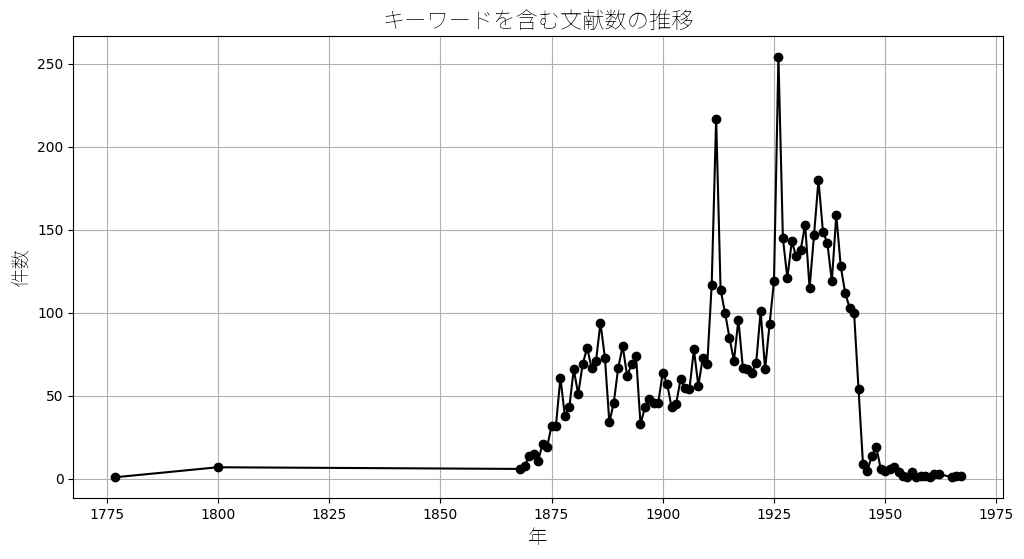

In [ ]:
# 必要なライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import YearLocator, DateFormatter
from matplotlib.font_manager import FontProperties

# 日本語フォントのアップロード後、指定するパスを変更
font_path = '/content/NotoSansJP-VariableFont_wght.ttf'  # フォントファイルのアップロード先を指定
jp_font = FontProperties(fname=font_path)

# publishyear 列の欠損値（0）を除外
filtered_df = df_sorted[df_sorted["publishyear"] != 0]

# 年ごとのケース数を集計
yearly_counts = filtered_df["publishyear"].value_counts().sort_index()

# 折れ線グラフを描画
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker="o", color="black")
plt.title("キーワードを含む文献数の推移",fontproperties=jp_font, fontsize=16)
plt.xlabel("年",fontproperties=jp_font, fontsize=14)
plt.ylabel("件数", fontproperties=jp_font, fontsize=14)
plt.grid(True)
plt.show()


## 出版社（者）の集計

In [ ]:
# publisher列を集計し、トップ30の表を作成する
# publisher 列の出現数を集計
publisher_counts = df_sorted["publisher"].value_counts()

# トップ30を取得
top_30_publishers = publisher_counts.head(30)

# トップ30の表を表示
top_30_publishers

,count
publisher,
博文館,179
吉川弘文館,60
春陽堂,58
経済雑誌社,58
最高裁判所,57
岩波書店,45
中央大学,44
早稲田大学出版部,42
鳥取県,36


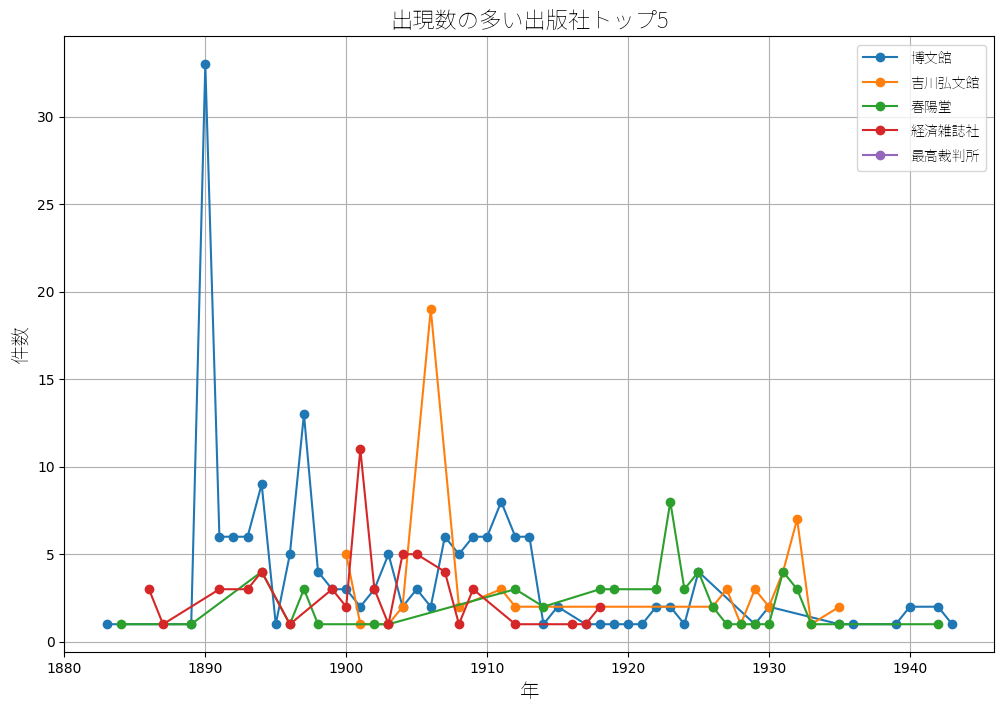

In [ ]:
# トップ5のpublisherについて、年ごとの出現数の折れ線グラフを描く

# 必要なライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import YearLocator, DateFormatter
from matplotlib.font_manager import FontProperties

# 日本語フォントのアップロード後、指定するパスを変更
font_path = '/content/NotoSansJP-VariableFont_wght.ttf'  # フォントファイルのアップロード先を指定
jp_font = FontProperties(fname=font_path)

# トップ5の publisher を取得
top_5_publishers = publisher_counts.head(5).index

# トップ5の各 publisher について年ごとの出現数を集計
plt.figure(figsize=(12, 8))

for publisher in top_5_publishers:
    publisher_yearly_counts = filtered_df[filtered_df["publisher"] == publisher]["publishyear"].value_counts().sort_index()
    plt.plot(
        publisher_yearly_counts.index,
        publisher_yearly_counts.values,
        marker="o",
        label=publisher
    )

# 折れ線グラフの設定
plt.title("出現数の多い出版社トップ5",fontproperties=jp_font, fontsize=16)
plt.xlabel("年",fontproperties=jp_font, fontsize=14)
plt.ylabel("件数",fontproperties=jp_font, fontsize=14)
legend = plt.legend(fontsize=12, loc='upper right')
for text in legend.get_texts():
    text.set_fontproperties(jp_font)
plt.grid(True)
plt.show()
